Допустим, у нас есть три точки на плоскости, и мы хотим провести через них "наилучшую" прямую линию `y = ax + b`

- Точка 1: $(0, 1)$
- Точка 2: $(1, 1)$
- Точка 3: $(2, 3)$

[[55 15]
 [15  5]]
[[63.6]
 [18.7]]
Initial A: [[55.  15.  63.6]
 [15.   5.  18.7]]
[[55.     15.     63.6   ]
 [ 0.      0.9091  1.3545]]
a: 0.75, b: 1.49
Numpy solve: [[0.75]
 [1.49]]


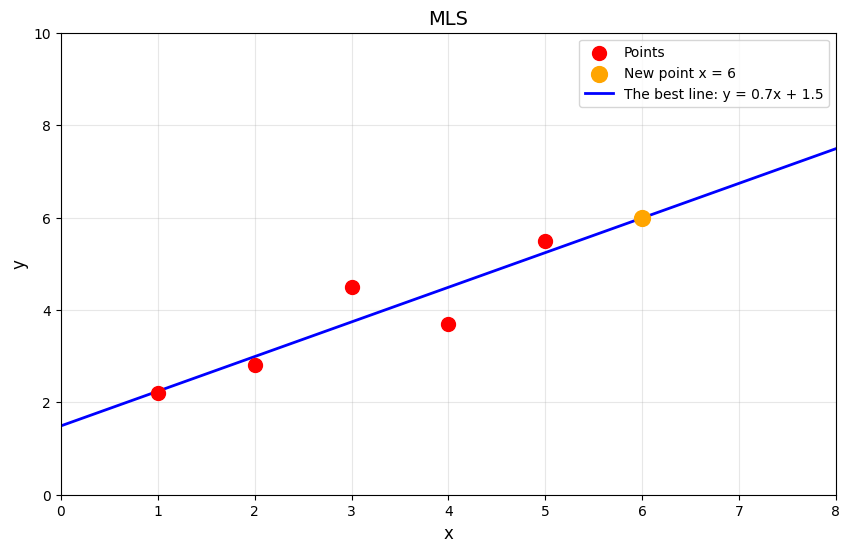

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Point to plot
x_points = np.array([1, 2, 3, 4, 5])
y_points = np.array([2.2, 2.8, 4.5, 3.7, 5.5])

# Matrix of x and ones
A_matrix = np.array([[1, 1], [2,1], [3,1], [4,1], [5, 1]])
# Vector of y 
b_vector = np.array([[2.2], [2.8], [4.5], [3.7], [5.5]])
# print(A_matrix)

A_T = A_matrix.transpose() # or .T
# print(A_T)

A_T_A_matrix = A_T @ A_matrix
A_T_b_vector = A_T @ b_vector
print(A_T_A_matrix)
print(A_T_b_vector)

# Solve system analytical
r1 = np.array([A_T_A_matrix[0][0], A_T_A_matrix[0][1], A_T_b_vector[0][0]])
r2 = np.array([A_T_A_matrix[1][0], A_T_A_matrix[1][1], A_T_b_vector[1][0]])
A = np.array([r1, r2])
print(f"Initial A: {A}")
# find a factor
factor = r2[0] / r1[0]
# Eliminate
r2 = r2 - factor * r1

# Result matrix
A = np.array([r1, r2])
np.set_printoptions(suppress=True, precision=4) # keep numbers understandable for human
print(A)

b = r2[2] / r2[1]
a = (r1[2] - r1[1]*b) / r1[0]
print(f"a: {a:.2f}, b: {b:.2f}")

#  Solve system
result = np.linalg.solve(A_T @ A_matrix, A_T @ b_vector)
print(f"Numpy solve: {result}")

#  Built-in
res_builtin = np.linalg.lstsq(A_matrix, b_vector)
# print(f"Built-in: {res_builtin[0]}")

x_line = np.linspace(0, 8, 100)
# y = ax + b
y_line = result[0] * x_line + result[1]

# New point
x = 6
y = result[0] * x + result[1]

#  Visual
plt.figure(figsize=(10, 6))
plt.scatter(x_points, y_points, color='red', s=100, zorder=3, label='Points')
plt.scatter(x, y, color='orange', s=130, zorder=3, label='New point x = 6')
plt.plot(x_line, y_line, 'b-', linewidth=2, label=f'The best line: y = {result[0][0]:.1f}x + {result[1][0]:.1f}')


plt.grid(True, alpha=0.3)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('MLS', fontsize=14)
plt.legend()
plt.xlim(0, 8)
plt.ylim(0, 10)
plt.show()